In [16]:
from thinkdsp import *
import numpy as np

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        # freq change
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        # steps
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        # apply default sawtooth code
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

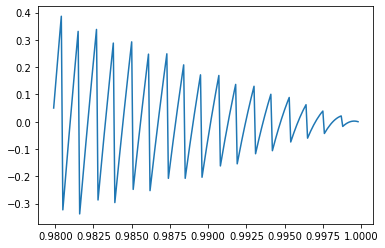

In [36]:
sig = SawtoothChirp(start=220, end=880)
wave = sig.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.segment(start=0.98, duration=0.02).plot()
wave.make_audio()

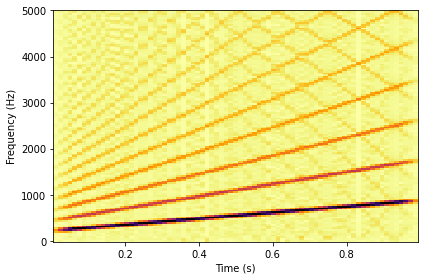

In [38]:
s = wave.make_spectrogram(256)
s.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

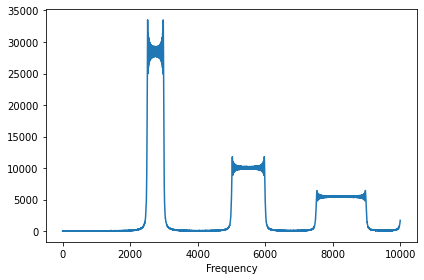

In [46]:
sig = SawtoothChirp(start=2500, end=3000)
w = sig.make_wave(duration=1, framerate=2000000)
spectrum = w.make_spectrum()
spectrum.plot(high = 10000)
decorate(xlabel='Frequency')

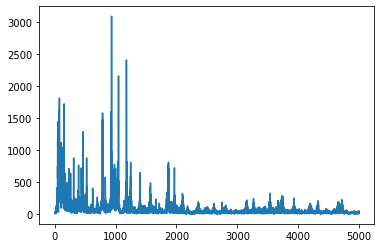

In [75]:
wave = read_wave('sound/halzion.wav')
segment = wave.segment(start=73.5, duration=1.5)
#segment.plot()
spec = segment.make_spectrum()
spec.plot(high = 5000)

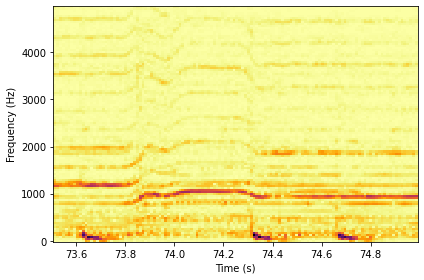

In [85]:
segment.make_spectrogram(1024).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [87]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts) - 1)
        freqs = 1 / lengths
        
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

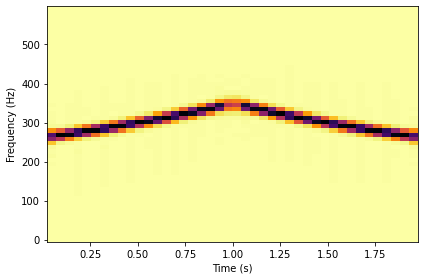

In [102]:
wave1 = MyTromboneGliss(262, 349).make_wave(duration=1)
wave2 = MyTromboneGliss(349, 262).make_wave(duration=1)
wave1.apodize(); wave2.apodize()
wave = wave1 | wave2
wave.make_spectrogram(1024).plot(high=600)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')
wave.make_audio()

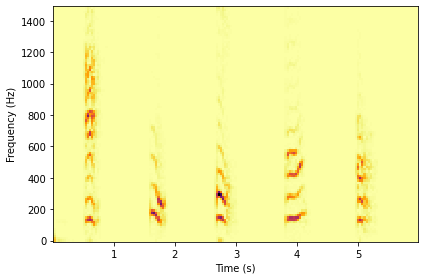

In [114]:
wave = read_wave('sound/aiueo.wav')
segment = wave.segment(start=0, duration=6)
segment.make_spectrogram(3000).plot(high=1500)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')